In [14]:
!pip install matplotlib seaborn statsmodels scipy

In [15]:
# 📥 STEP 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, skew, kurtosis
from statsmodels.tsa.stattools import adfuller

# 📂 STEP 3: Load dataset
file_path = '/content/cleaned_imports_from_asian_countries.csv'  # upload via Colab UI
df = pd.read_csv(file_path)

In [16]:
# 🧹 STEP 4: Preprocessing
df['date'] = pd.to_datetime(df['date'])
df.drop(columns=['id'], inplace=True)

In [17]:
# 🧾 STEP 5: Descriptive Statistics
print("\n📊 Basic Descriptive Stats:")
display(df.describe(include='all'))


📊 Basic Descriptive Stats:


,date,country_name,alpha_3_code,country_code,region,region_code,sub_region,sub_region_code,hs_code,commodity,unit,value_qt,value_rs,value_dl
count,730247,730247,730247,730247.000000,730247,730247.0,730247,730247.000000,7.302470e+05,730247,730247,7.302470e+05,7.302470e+05,730247.000000
unique,NaN,49,49,NaN,1,NaN,5,NaN,NaN,8638,16,NaN,NaN,NaN
top,NaN,China,CHN,NaN,Asia,NaN,Eastern Asia,NaN,NaN,Others,Kgs,NaN,NaN,NaN
freq,NaN,166013,166013,NaN,730247,NaN,398015,NaN,NaN,54125,461341,NaN,NaN,NaN
mean,2016-05-06 07:51:19.685092608,NaN,NaN,406.985228,NaN,142.0,NaN,46.295677,6.325413e+07,NaN,NaN,7.802115e+02,5.546037e+02,0.846575
min,2015-01-01 00:00:00,NaN,NaN,4.000000,NaN,142.0,NaN,30.000000,1.012910e+06,NaN,NaN,0.000000e+00,6.000000e-02,0.000000
25%,2015-09-01 00:00:00,NaN,NaN,156.000000,NaN,142.0,NaN,30.000000,3.926203e+07,NaN,NaN,1.400000e-01,3.320000e+00,0.010000
50%,2016-05-01 00:00:00,NaN,NaN,392.000000,NaN,142.0,NaN,30.000000,7.114191e+07,NaN,NaN,2.340000e+00,2.096000e+01,0.030000
75%,2017-01-01 00:00:00,NaN,NaN,682.000000,NaN,142.0,NaN,35.000000,8.473500e+07,NaN,NaN,3.274000e+01,1.159000e+02,0.180000
max,2017-10-01 00:00:00,NaN,NaN,887.000000,NaN,142.0,NaN,145.000000,9.805900e+07,NaN,NaN,1.818343e+06,1.036776e+06,1629.260000


In [18]:
# 🧼 STEP 14: Outlier Detection & Removal using IQR Method

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    original_len = len(df)
    df_clean = df[(df[column] >= lower) & (df[column] <= upper)]
    print(f"{column}: Removed {original_len - len(df_clean)} outliers")
    return df_clean

# Apply outlier removal to relevant numerical columns
columns_to_clean = ['value_qt', 'value_rs', 'value_dl']
df_cleaned = df.copy()
for col in columns_to_clean:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

# Show how many rows remain
print(f"\n✅ After outlier removal: {len(df_cleaned)} rows remain out of {len(df)}")


value_qt: Removed 126012 outliers
value_rs: Removed 78828 outliers
value_dl: Removed 45316 outliers

✅ After outlier removal: 480091 rows remain out of 730247


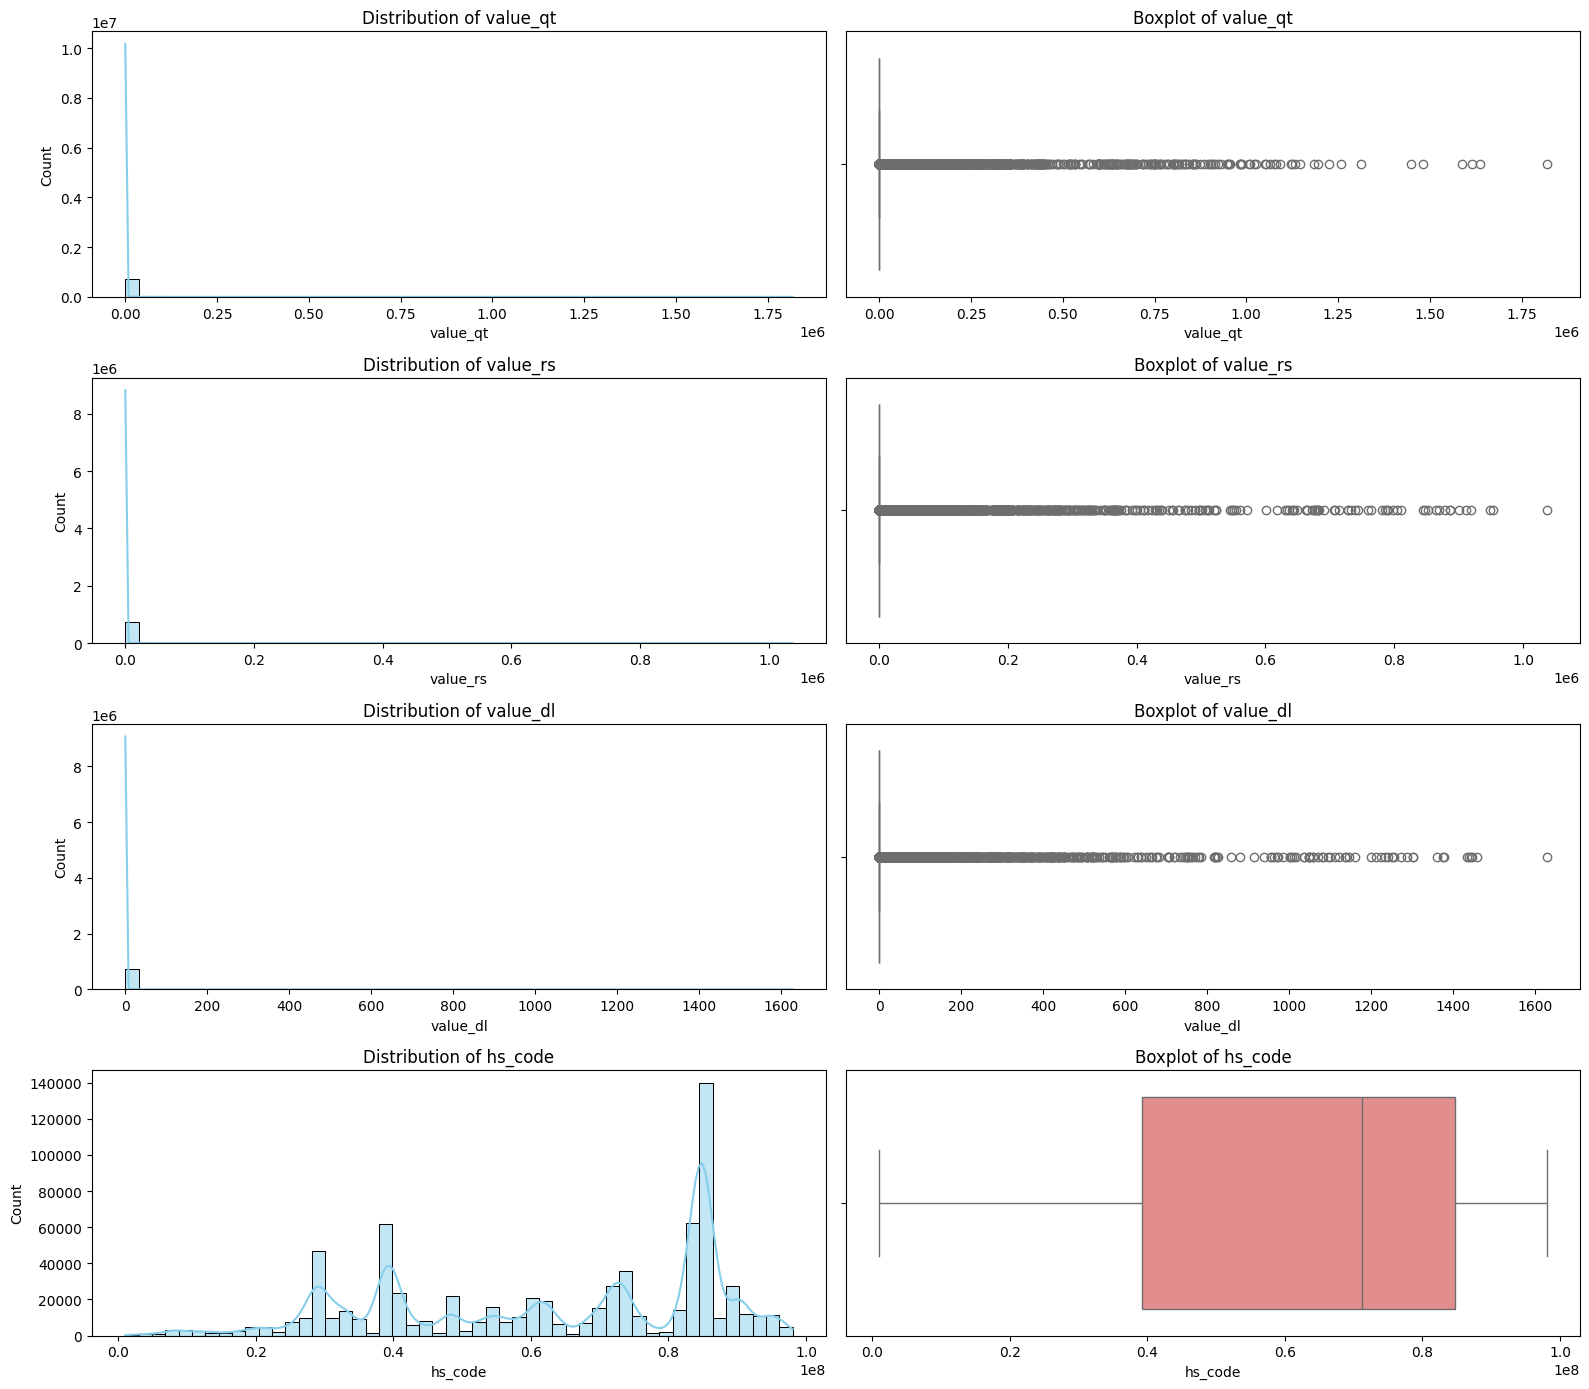

In [19]:
# 🎨 STEP 6: Distribution and Box Plots
num_cols = ['value_qt', 'value_rs', 'value_dl', 'hs_code']
plt.figure(figsize=(16, 14))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 2, 2*i+1)
    sns.histplot(df[col], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribution of {col}')

    plt.subplot(len(num_cols), 2, 2*i+2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


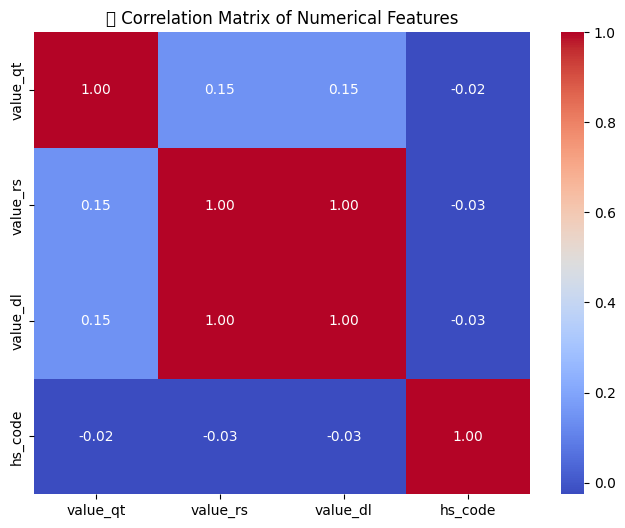

In [20]:
# 🔥 STEP 7: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📌 Correlation Matrix of Numerical Features")
plt.show()

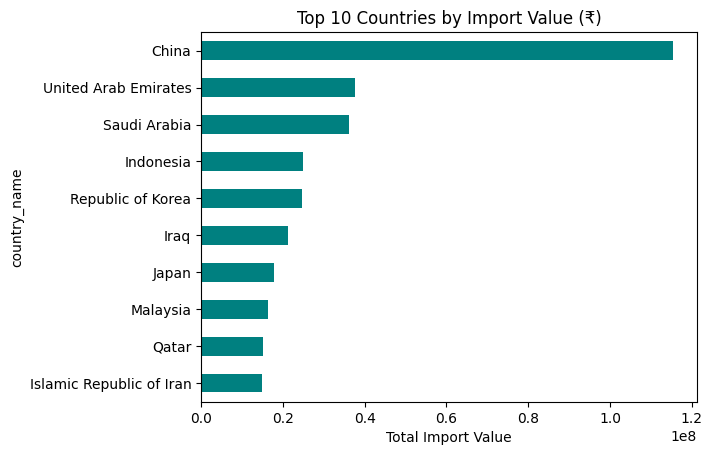

In [21]:
# 🌍 STEP 8: Top Countries by Total Import Value
top_countries = df.groupby('country_name')['value_rs'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='barh', color='teal')
plt.title("Top 10 Countries by Import Value (₹)")
plt.xlabel("Total Import Value")
plt.gca().invert_yaxis()
plt.show()

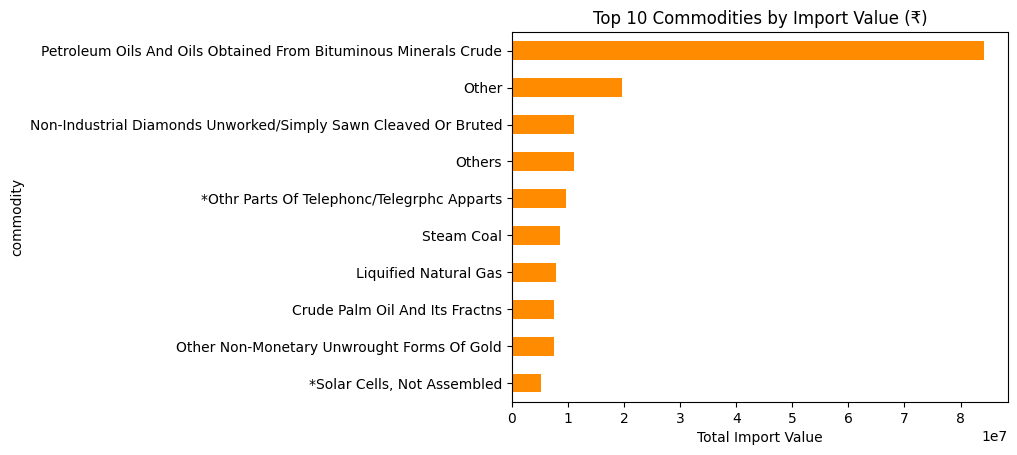

In [22]:
# 🛍️ STEP 9: Top Commodities by Value
top_commodities = df.groupby('commodity')['value_rs'].sum().sort_values(ascending=False).head(10)
top_commodities.plot(kind='barh', color='darkorange')
plt.title("Top 10 Commodities by Import Value (₹)")
plt.xlabel("Total Import Value")
plt.gca().invert_yaxis()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


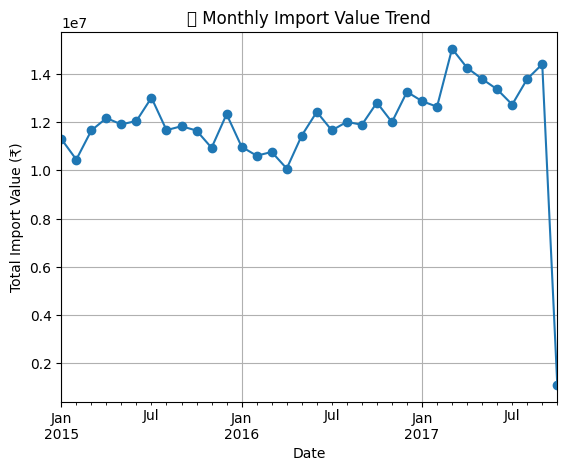

In [23]:
# 🕒 STEP 10: Time-Series Trend of Monthly Import Value
monthly_trend = df.groupby('date')['value_rs'].sum()
monthly_trend.plot(marker='o', linestyle='-')
plt.title("📈 Monthly Import Value Trend")
plt.xlabel("Date")
plt.ylabel("Total Import Value (₹)")
plt.grid(True)
plt.show()

In [24]:
# 📐 STEP 11: Skewness and Kurtosis
print("\n🔍 Skewness and Kurtosis:")
for col in num_cols:
    print(f"{col}: Skewness = {skew(df[col]):.2f}, Kurtosis = {kurtosis(df[col]):.2f}")


🔍 Skewness and Kurtosis:
value_qt: Skewness = 50.10, Kurtosis = 3339.59
value_rs: Skewness = 57.56, Kurtosis = 4202.01
value_dl: Skewness = 57.78, Kurtosis = 4243.90
hs_code: Skewness = -0.45, Kurtosis = -1.15


In [25]:
# 🧪 STEP 12: Normality Tests (Shapiro and D’Agostino’s K²)
print("\n🧪 Normality Tests:")
for col in num_cols:
    try:
        stat, p = shapiro(df[col].sample(5000, random_state=1))  # sample to avoid memory issues
        print(f"{col} (Shapiro): p-value = {p:.4f}")
    except:
        print(f"{col} (Shapiro): Test skipped due to size")

    stat, p = normaltest(df[col].sample(5000, random_state=1))
    print(f"{col} (D’Agostino): p-value = {p:.4f}")


🧪 Normality Tests:
value_qt (Shapiro): p-value = 0.0000
value_qt (D’Agostino): p-value = 0.0000
value_rs (Shapiro): p-value = 0.0000
value_rs (D’Agostino): p-value = 0.0000
value_dl (Shapiro): p-value = 0.0000
value_dl (D’Agostino): p-value = 0.0000
hs_code (Shapiro): p-value = 0.0000
hs_code (D’Agostino): p-value = 0.0000


In [26]:
# 📉 STEP 13: Stationarity Test (ADF) for value_rs over time
print("\n📉 ADF Stationarity Test (on monthly value_rs):")
monthly_rs = df.groupby('date')['value_rs'].sum()
result = adfuller(monthly_rs)
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value:.4f}')


📉 ADF Stationarity Test (on monthly value_rs):
ADF Statistic: -2.8716
p-value: 0.0488
Critical Value (1%): -3.6996
Critical Value (5%): -2.9764
Critical Value (10%): -2.6276
